In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.set_printoptions(precision=3)

path = 'Advertising.csv'
data = pd.read_csv(path)  # TV、Radio、Newspaper、Sales
data.insert(0, 'other', 1)

x = data.values[:, : -1]
y = data.values[:, -1]

In [2]:
data.head(10)

,other,TV,radio,newspaper,sales
1,1,230.1,37.8,69.2,22.1
2,1,44.5,39.3,45.1,10.4
3,1,17.2,45.9,69.3,9.3
4,1,151.5,41.3,58.5,18.5
5,1,180.8,10.8,58.4,12.9
6,1,8.7,48.9,75.0,7.2
7,1,57.5,32.8,23.5,11.8
8,1,120.2,19.6,11.6,13.2
9,1,8.6,2.1,1.0,4.8
10,1,199.8,2.6,21.2,10.6


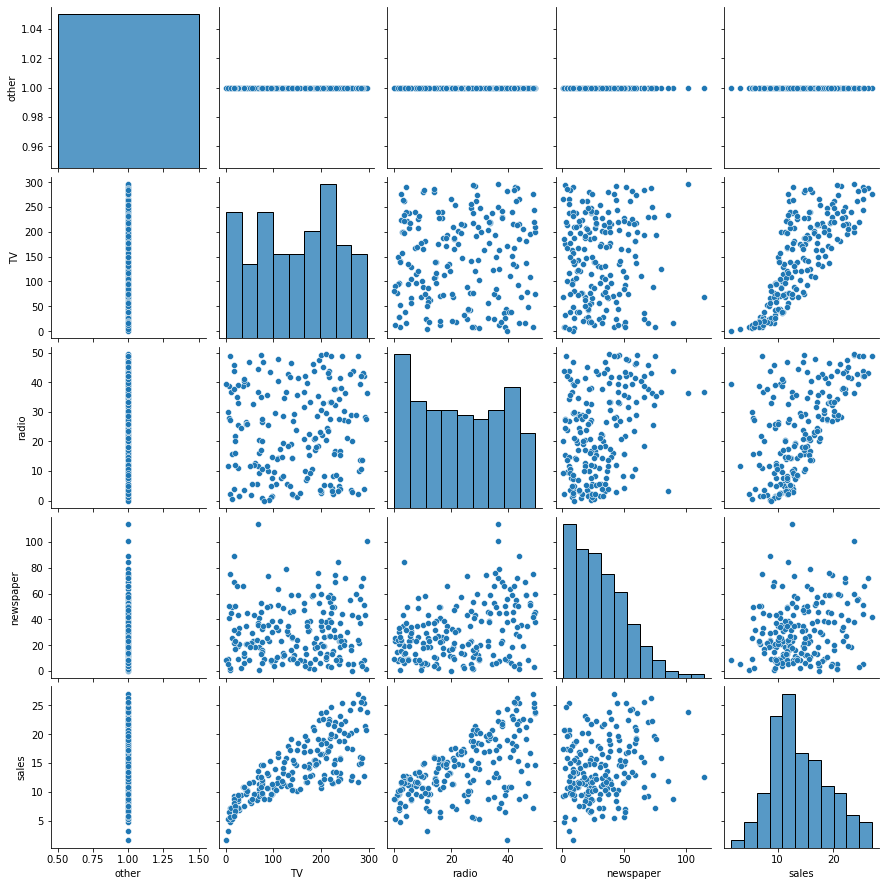

In [3]:
# 关系图
sns.pairplot(data)

/Users/shiweili/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/shiweili/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


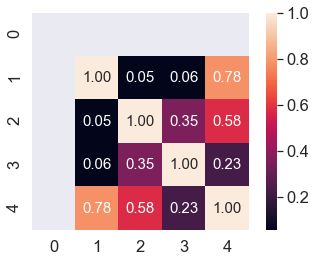

,sales
sales,1.000000
TV,0.782224
radio,0.576223
newspaper,0.228299
other,NaN


In [4]:
# 皮尔逊相关系数,及热力图
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15} 
                ) 
plt.show()

# 皮尔逊相关系数
data.corr()[['sales']].sort_values(by='sales', ascending=False)

In [5]:
linreg = LinearRegression()
model = linreg.fit(x, y)
print('包θ:')
print('coef:', linreg.coef_, 'intercept:', np.array2string(linreg.intercept_))
score = linreg.score(x, y)
print('SCORE:', np.array2string(score))
prediction = linreg.predict(x)
# 平均绝对误差(RMSE)
print('RMSE',  np.array2string(np.sqrt(mean_squared_error(y, prediction))))
# 平均绝对误差(MAE)
print('MAE', np.array2string(mean_absolute_error(y, prediction)))

包θ:
coef: [ 0.     0.046  0.189 -0.001] intercept: 2.939
SCORE: 0.897
RMSE 1.669
MAE 1.252


In [6]:
#公式法推导最小二乘 https://blog.csdn.net/perfect_accepted/article/details/78383434
def linearRegLsq(x,y):
    # 最小二乘法直接求解theta
    xtx = np.dot(x.T, x)
    if np.linalg.det(xtx) == 0.0: # 判断xtx行列式是否等于0，奇异矩阵不能求逆
        print('Can not resolve the problem')
        return
    theta_lsq = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
    return theta_lsq

In [8]:
theta_lsq = linearRegLsq(x, y)
prediction_2 = x[:, :1] * theta_lsq[0] + x[:, 1:2] * theta_lsq[1] + x[:, 2:3] * theta_lsq[2]
print('最小二乘法')
print(theta_lsq.reshape(1, 4)[0])
# 平均绝对误差(RMSE)
print('RMSE', np.array2string(np.sqrt(mean_squared_error(y, prediction_2))))
# 平均绝对误差(MAE)
print('MAE', np.array2string(mean_absolute_error(y, prediction_2)))

最小二乘法
[ 2.939e+00  4.576e-02  1.885e-01 -1.037e-03]
RMSE 1.669
MAE 1.247


In [9]:
def linearRegBgd1(x, y, alpha=0.005, lamba=0.005, loop_max=1000):
    feature_cnt = len(x)
    theta = np.zeros(feature_cnt)
    for times in range(loop_max):
        y_hat = np.dot(x.T, theta)
        loss = y - y_hat
        for i in range(1, feature_cnt):
            if i == 1:
                loss_n = np.row_stack((loss, loss))
            elif i > 1:
                loss_n = np.row_stack((loss_n, loss))
        theta_old = theta
        theta = theta + (alpha*x.T*loss_n.T).sum(axis = 0)
        if (theta - theta_old).all() < 10000000000000000000:
            break
    return theta
    #0.001

In [10]:
theta1 = linearRegBgd1(x.T, y.T, alpha = 0.0000001)
print('批量梯度下降')

批量梯度下降


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.set_printoptions(precision=3)

path = 'Advertising.csv'
data = pd.read_csv(path)  # TV、Radio、Newspaper、Sales
data.insert(0, 'other', 1)

x = data.values[:, : -1]
y = data.values[:, -1]

In [1]:
x = data.values[:, : -1]
y = data.values[:, -1]

# 初始化参数
theta = np.zeros(len(x.T))

cnt = 0
diff = [0, 0]
error0 = 0
error1 = 0

epsilon = 0.001
max_itor = 1000
alpha = 0.00001
error = []

while True:
    cnt += 1
    
    # 参数迭代计算
    for i in range(len(x)):
        # 拟合函数为 y = theta0 * x[0] + theta1 * x[1] +theta2 * x[2]
        diff[0] = theta[0] * x[i][0] + theta[1] * x[i][1] + theta[2] * x[i][2] + theta[3] * x[i][3] - y[i]

        theta[0] -= alpha * diff[0] * x[i][0]
        theta[1] -= alpha * diff[0] * x[i][1]
        theta[2] -= alpha * diff[0] * x[i][2]
        theta[3] -= alpha * diff[0] * x[i][3]

    # 计算损失函数
    error1 = 0
    for lp in range(len(x)):
        p = theta[0] * x[lp][0] + theta[1] * x[lp][1] + theta[2] * x[lp][2] + theta[3] * x[lp][3]
        error.append(p)
        error1 += (y[lp]- p )**2/2
    if abs(error1-error0) < epsilon:
        break
    else:
        error0 = error1
        error = []
    #print (theta[0], theta[1], theta[2], theta[3], error1)
print('Done: theta0 : %f, theta1 : %f, theta2 : %f, theta3 : %f' % (theta[0], theta[1], theta[2], theta[3]))
print('迭代次数: %d' % cnt)
print('RMSE', np.array2string(np.sqrt(mean_squared_error(y, error))))

NameError: name 'data' is not defined

In [32]:
import numpy as np

# Size of the points dataset.
m = 20

# Points x-coordinate and dummy value (x0, x1).
X0 = np.ones((m, 1))
X1 = np.arange(1, m+1).reshape(m, 1)
X = np.hstack((X0, X1))

# Points y-coordinate
y = np.array([
    3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
    11, 13, 13, 16, 17, 18, 17, 19, 21
]).reshape(m, 1)

# The Learning Rate alpha.
alpha = 0.01

def X_3(theta, X, y):
    '''Error function J definition.'''
    diff = np.dot(X, theta) - y
    return (1./2*m) * np.dot(np.transpose(diff), diff)

def X_2(theta, X, y):
    '''Gradient of the function J definition.'''
    return (1./m) * np.dot(X.T, np.dot(X, theta) - y)

def X_1(X, y, alpha):
    '''Perform gradient descent.'''
    theta = np.array([1, 1]).reshape(2, 1)
    gradient = X_2(theta, X, y)
    while not np.all(np.absolute(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = X_2(theta, X, y)
    return theta


optimal = X_1(X, y, alpha)
print('optimal:', optimal)
print('error function:', X_3(optimal, X, y)[0,0])

optimal: [[0.51583286]
 [0.96992163]]
error function: [[405.98496249]]
